In [41]:
# Definer variabler og importer pakker

import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

def x_d(p):
    return 500 - 3.2*(p)

def x_s(p, t):
    return -100 + 4.3*(p-t)

In [42]:
# definerer symboler
p, t =sp.symbols('p t', real=True, positive=True)

In [43]:
# likning for likevekt
eq_cond = sp.Eq(x_d(p), x_s(p, t))

In [44]:
# funksjon for likevekt pris
p_eq_cond = sp.solve(eq_cond, p)

In [45]:
#funksjon for likevekt kvantum
k_eq_cond = x_s(p_eq_cond[0], t)

In [46]:
#vis funksjoner
display(p_eq_cond[0], k_eq_cond)

0.573333333333333*t + 80.0

244.0 - 1.83466666666667*t

In [47]:
# lambdify

p_eq_fn = sp.lambdify (
    (p, t),
    p_eq_cond[0]
)

# pris p_eq_fn(p, t)
p_eq_fn(p, t)
p_eq_fn_u = p_eq_fn(0, 0)
p_eq_fn_m = p_eq_fn(0, 4)

k_eq_fn = sp.lambdify (
    (p),
    k_eq_cond

)

# kvantum
k_eq_fn(0)

#avgift
avgift = p_eq_fn_m - p_eq_fn_u
prod= 4- avgift

display(p_eq_fn(p, t),
p_eq_fn_u,
p_eq_fn_m,
k_eq_fn(p),
k_eq_fn(0),
avgift, 
prod)

0.573333333333333*t + 80.0

80.0

82.29333333333334

244.0 - 1.83466666666667*t

244.0 - 1.83466666666667*t

2.2933333333333366

1.7066666666666634

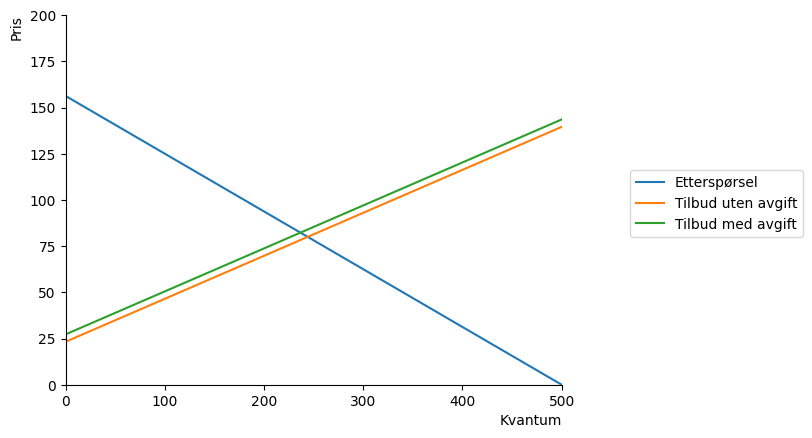

In [48]:
# 3. Likevekt for t=0 & t=4

#lager tallrekker
x_num = np.linspace (0.1, 500, 100)
q = np.linspace(0, p_eq_fn_u, 100)

#lag graf

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris', loc='top')
                ax.set_xlabel('Kvantum', loc='right')
                ax.set(xlim=(0, 500))
                ax.set(ylim=(0,200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

#lag akser
ax.plot(x_d(x_num), x_num, label= "Etterspørsel")
ax.plot(x_s(x_num, 0), x_num, label= "Tilbud uten avgift")
ax.plot(x_s(x_num, 4), x_num, label= "Tilbud med avgift")


ax.legend(bbox_to_anchor=(1.5,0.6));

In [49]:
# KO & PO & avgiftsproveny

producer_surplus=sp.integrate(x_d(p_eq_fn_u)-x_s(p, 0),(p,0,p_eq_fn_u))


consumer_surplus=sp.integrate(x_d(p)-p_eq_fn_u,(p,0,p_eq_fn_u))


welfare_surplus=float(sp.integrate(x_d(p)-x_s(p, 0),(p,0,p_eq_fn_u)))


display(producer_surplus, consumer_surplus, welfare_surplus)

13760.0000000000

23360.0000000000

24000.0

In [50]:
#5. lag tabell

from IPython.display import Markdown

tbl=f"""
|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------:|
| Solgt mengde:      |         |
| Pris:               | ${np.round(float(p_eq_fn_u),2)}$              |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),2)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),2)}$ | 
| Samfunnsøkonomisk overskudd:    | ${np.round(float(welfare_surplus),2)}$   | 
"""
display(Markdown(tbl))


|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------:|
| Solgt mengde:      |         |
| Pris:               | $80.0$              |
| Konsumentoverskudd: | $23360.0$ | 
| Produsentoverskudd: | $13760.0$ | 
| Samfunnsøkonomisk overskudd:    | $24000.0$   | 
